<a href="https://colab.research.google.com/github/cszafariqbal/cszafar/blob/master/Data_Analysis_Suicide_Rates_Overview_1985_to_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Suicide Rates Overview (1985 to 2021)

This dataset is an addition to the original dataset. This compiled dataset was pulled from four other datasets linked by time and place and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We shall be downloading a dataset from Kaggle to carry out an analysis on, we dowland the dataet by using  the opendatasets liabrary

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./suicide-rates-overview-1985-to-2021" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './suicide-rates-overview-1985-to-2021'

In [ ]:
import os
os.listdir(data_dir)

['master.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "suicide-rates-overview-project"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zeeooma123/suicide-rates-overview-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/zeeooma123/suicide-rates-overview-project


'https://jovian.com/zeeooma123/suicide-rates-overview-project'

## Data Preparation and Cleaning

We first need to install the libraries we shall use in the analysis and clean up our data of any missing or outlier values.

In [ ]:
import pandas as pd

In [ ]:
suicide_raw_df = pd.read_csv('./suicide-rates-overview-1985-to-2021/master.csv')
suicide_raw_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [ ]:
suicide_raw_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
selected_columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']

In [ ]:
suicide_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [ ]:
suicide_raw_df.shape

(31756, 12)

In [ ]:
suicide_raw_df.drop(suicide_raw_df[suicide_raw_df.suicides_no.isna()].index, inplace=True)

In [ ]:
suicide_raw_df = suicide_raw_df.drop_duplicates()

In [ ]:
suicide_raw_df.shape

(30556, 12)

In [ ]:
suicide_raw_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,30556.000000,30556.000000,3.055600e+04,30556.000000,11100.000000,30556.000000
mean,2002.766854,237.136242,4.990492e+06,12.176806,0.791232,17447.027437
std,9.408922,867.956107,3.352492e+07,21.883165,0.095652,19314.352213
min,1985.000000,0.000000,2.780000e+02,0.000000,0.386358,251.000000
25%,1995.000000,3.000000,1.198480e+05,0.553214,0.723000,3672.000000
50%,2003.000000,25.000000,5.148010e+05,4.790000,0.795893,9978.000000
75%,2010.000000,132.000000,2.401046e+06,15.150000,0.873000,25570.000000
max,2020.000000,22338.000000,1.396215e+09,515.092734,0.972758,126352.000000


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zeeooma123/suicide-rates-overview-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/zeeooma123/suicide-rates-overview-project


'https://jovian.com/zeeooma123/suicide-rates-overview-project'

## Exploratory Analysis and Visualization

In Exploratory Analysis and Visualizatio process we show the data graphically by using bargraph, lineplot, scatter etc.., now here we diffrent type of graph to be used to represent the dataset.We shall now explore our data to get a high level overview of it's structure and characteristics


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'sex vs suicides_no')

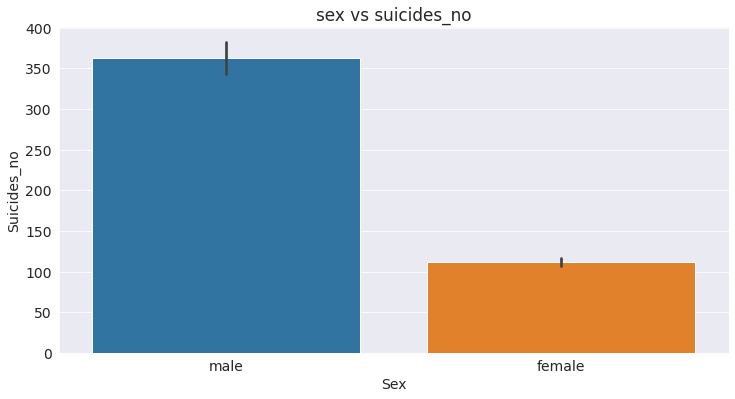

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='suicides_no', data=suicide_raw_df);
plt.xlabel('Sex')
plt.ylabel('Suicides_no')
plt.title("sex vs suicides_no")

Text(0.5, 1.0, 'Sex vs Population')

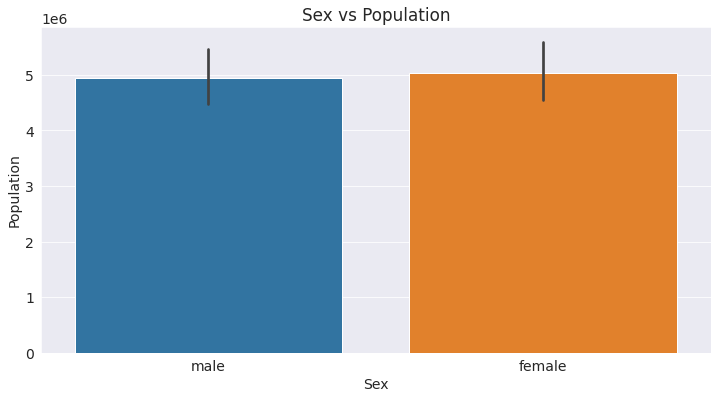

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='sex', y='population', data=suicide_raw_df);
plt.xlabel('Sex')
plt.ylabel('Population')
plt.title("Sex vs Population")


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'Year vs Population')

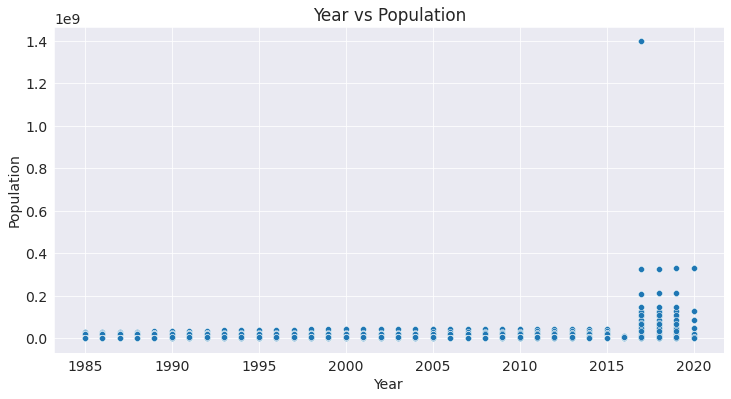

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='year', y='population', data=suicide_raw_df);
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Year vs Population')


Text(0.5, 1.0, 'Population vs Sex')

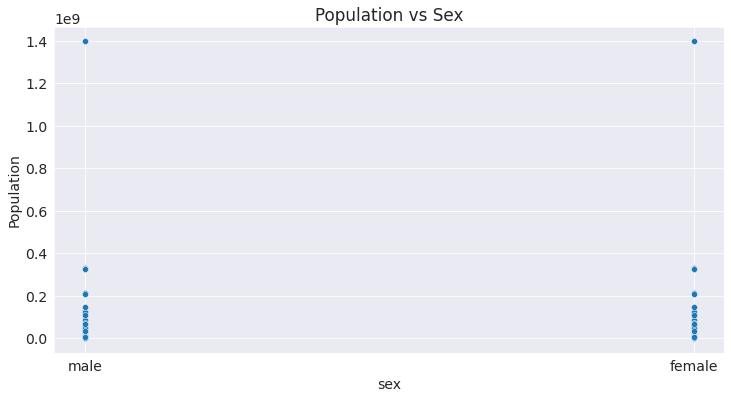

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='sex', y='population' , data=suicide_raw_df);
plt.xlabel('sex')
plt.ylabel('Population')
plt.title('Population vs Sex')


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'line plot of Population')

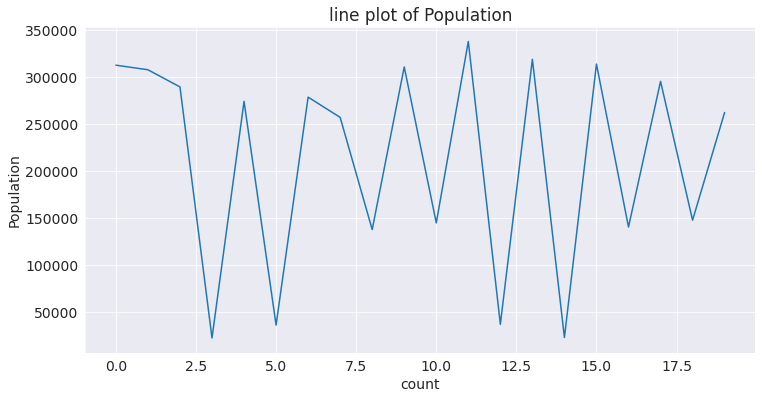

In [ ]:
df = suicide_raw_df.head(20)
plt.figure(figsize=(12,6))
plt.plot(df.population)
plt.xlabel('count')
plt.ylabel('Population')
plt.title('line plot of Population')



Text(0.5, 1.0, 'suicides_no count')

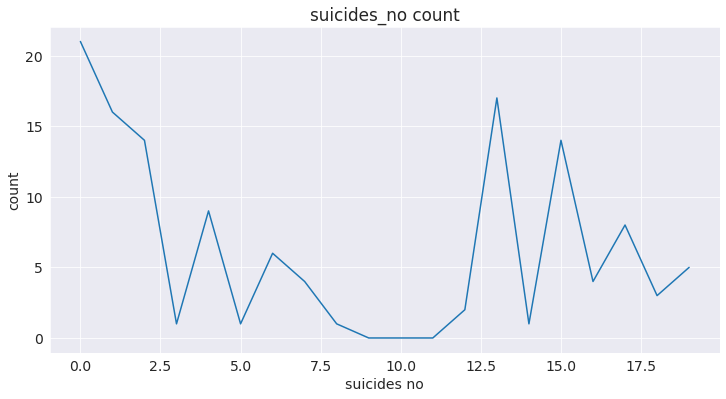

In [ ]:
df = suicide_raw_df.head(20)
plt.figure(figsize=(12,6))
plt.plot(df.suicides_no)
plt.xlabel('suicides no')
plt.ylabel('count')
plt.title('suicides_no count')


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


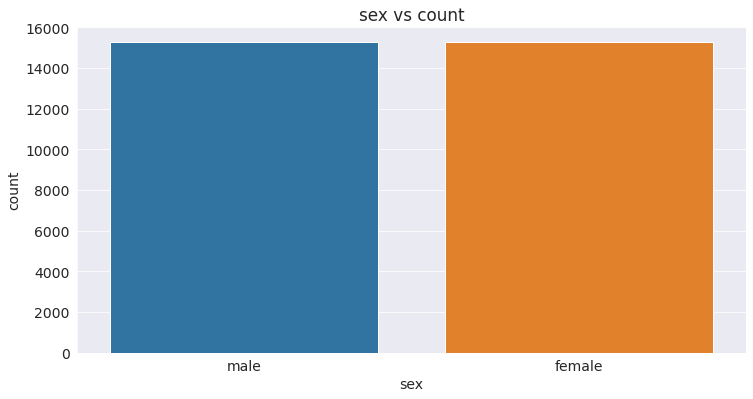

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(suicide_raw_df.sex);
plt.xlabel('sex')
plt.ylabel('count')
plt.title('sex vs count')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


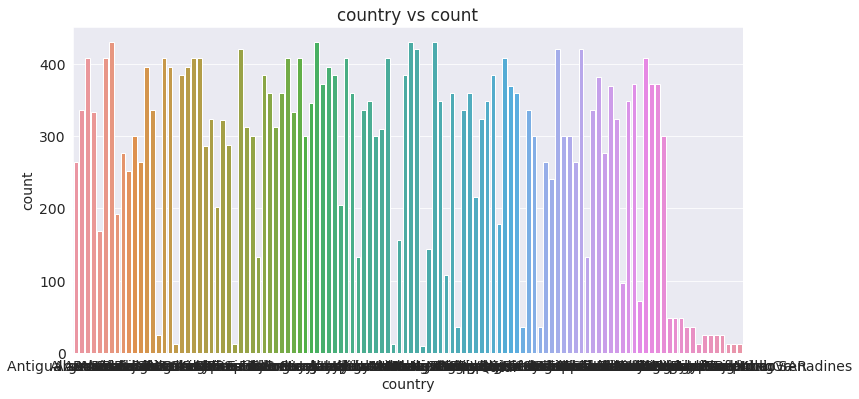

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(suicide_raw_df.country);
plt.xlabel('country')
plt.ylabel('count')
plt.title('country vs count')

plt.show()

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'suicides_no vs count')

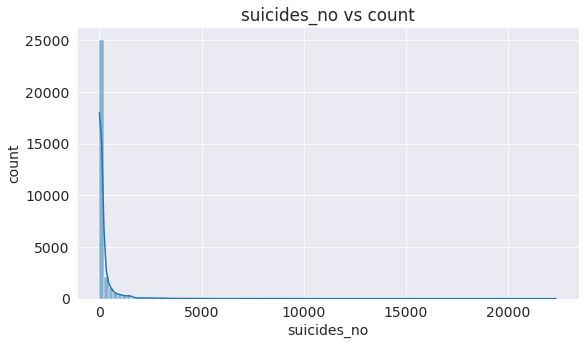

In [ ]:
sns.histplot(x=suicide_raw_df.suicides_no, bins=100, kde=True);
plt.xlabel('suicides_no')
plt.ylabel('count')
plt.title('suicides_no vs count')


Text(0.5, 1.0, 'year vs count')

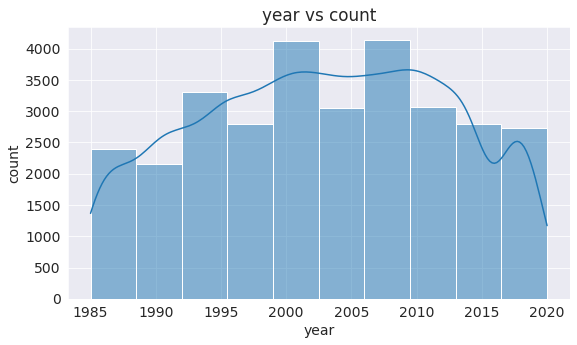

In [ ]:
sns.histplot(x=suicide_raw_df.year, bins=10, kde=True);
plt.xlabel('year')
plt.ylabel('count')
plt.title('year vs count')


Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zeeooma123/suicide-rates-overview-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/zeeooma123/suicide-rates-overview-project


'https://jovian.com/zeeooma123/suicide-rates-overview-project'

## Asking and Answering Questions

In this section we asking the questions and then find the answers of these questions using by graphicaaly or numpy/pandas  



#### Q1: TODO - How do you count the number of  rows of the columns of a dataset?

In [ ]:
suicide_raw_df.country.count()

30556

In [ ]:
suicide_raw_df.suicides_no[suicide_raw_df.suicides_no >= 15].count()

17599

In [ ]:
suicide_raw_df.suicides_no[suicide_raw_df.suicides_no <= 150].count()

23438

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zeeooma123/suicide-rates-overview-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/zeeooma123/suicide-rates-overview-project


'https://jovian.com/zeeooma123/suicide-rates-overview-project'

#### Q2: TODO - show the barplot of less than 150 suicide_no column of dataset (suicide_raw_df)

In [ ]:
data = suicide_raw_df[suicide_raw_df.suicides_no <= 150]

In [ ]:
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31748,Tajikistan,2017,female,75+ years,0.0,8925525,0.000000,Tajikistan2017,0.628268,7536439875,848.672380,G.I. Generation
31749,Thailand,2017,female,75+ years,59.0,70898202,0.083218,Thailand2017,0.787437,4.56E+11,6593.818352,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


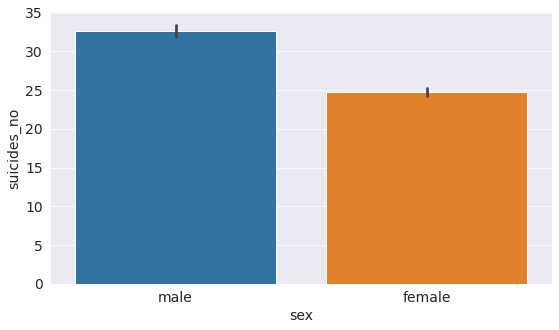

In [ ]:
sns.barplot(data.sex, data.suicides_no)
plt.show()

#### Q3: sow the top 10 high population in the data set ?

In [ ]:
sorted_data = suicide_raw_df.sort_values('population', ascending=False)

In [ ]:
top_high_population  = sorted_data.head(10)

In [ ]:
top_high_population

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
28078,"China, Hong Kong SAR",2017,male,5-14 years,3.0,1396215000,0.000215,"China, Hong Kong SAR2017",0.927732,1.23E+13,8816.986905,Generation X
28734,"China, Hong Kong SAR",2017,male,25-34 years,62.0,1396215000,0.004441,"China, Hong Kong SAR2017",0.927732,1.23E+13,8816.986905,Boomers
29390,"China, Hong Kong SAR",2017,male,55-74 years,165.0,1396215000,0.011818,"China, Hong Kong SAR2017",0.927732,1.23E+13,8816.986905,G.I. Generation
31358,"China, Hong Kong SAR",2017,female,55-74 years,87.0,1396215000,0.006231,"China, Hong Kong SAR2017",0.918620,1.23E+13,8816.986905,G.I. Generation
31686,"China, Hong Kong SAR",2017,female,75+ years,56.0,1396215000,0.004011,"China, Hong Kong SAR2017",0.918620,1.23E+13,8816.986905,G.I. Generation
30702,"China, Hong Kong SAR",2017,female,25-34 years,48.0,1396215000,0.003438,"China, Hong Kong SAR2017",0.918620,1.23E+13,8816.986905,Boomers
28406,"China, Hong Kong SAR",2017,male,15-24 years,54.0,1396215000,0.003868,"China, Hong Kong SAR2017",0.927732,1.23E+13,8816.986905,Generation X
29062,"China, Hong Kong SAR",2017,male,35-54 years,148.0,1396215000,0.010600,"China, Hong Kong SAR2017",0.927732,1.23E+13,8816.986905,Silent
30046,"China, Hong Kong SAR",2017,female,5-14 years,2.0,1396215000,0.000143,"China, Hong Kong SAR2017",0.918620,1.23E+13,8816.986905,Generation X
30374,"China, Hong Kong SAR",2017,female,15-24 years,21.0,1396215000,0.001504,"China, Hong Kong SAR2017",0.918620,1.23E+13,8816.986905,Generation X


#### Q4: TODO - sow the barplot graph of top 10 rows between sex and population in the data set ?

In [ ]:
population_data = suicide_raw_df[['sex','population']]

In [ ]:
x = population_data.head(10)

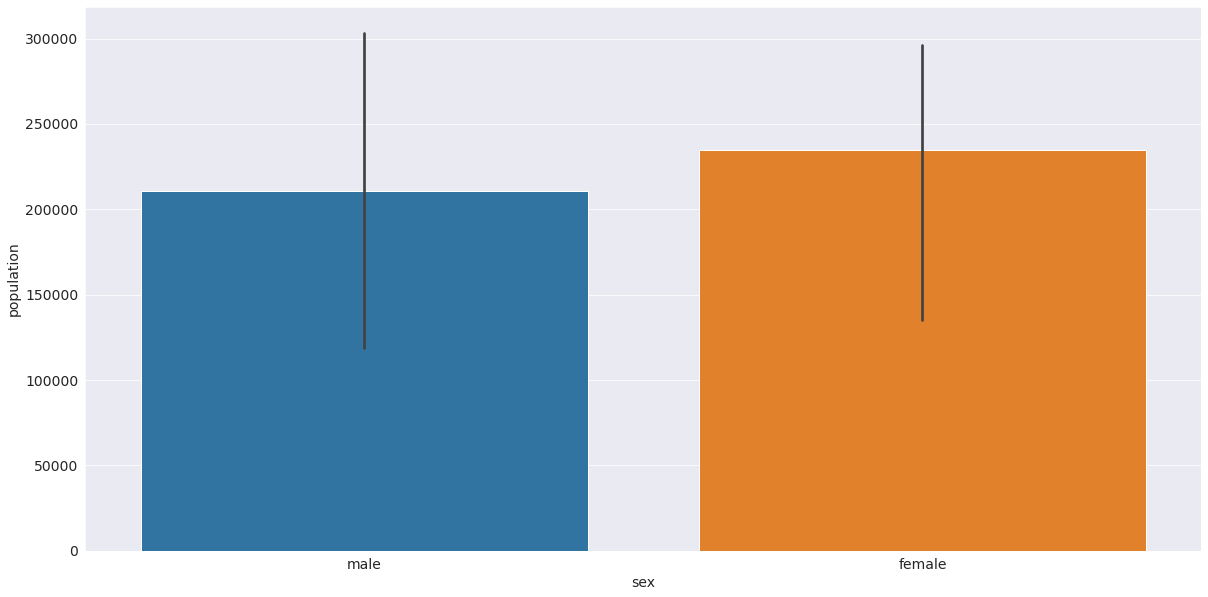

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = x.sex, y = x.population);
plt.show()

#### Q5: find the sum of population of the all countries's population in the dataset?

In [ ]:
population_df = suicide_raw_df.population

In [ ]:
sum_of_pppulation = population_df.sum()

In [ ]:
sum_of_pppulation

152489480296

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zeeooma123/suicide-rates-overview-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/zeeooma123/suicide-rates-overview-project


'https://jovian.com/zeeooma123/suicide-rates-overview-project'

## Inferences and Conclusion

From what we have analyze we found that:
- We shall be downloading a dataset from Kaggle to carry out an analysis Suicide Rates Overview (1985 to 2021).
- Data Preparation and Cleaning in which we find cleang data in data frame
- In Exploratory Analysis and Visualizatio process we show the data graphically by using bargraph, lineplot, scatter etc.., now   here we diffrent type of graph to be used to represent the datase
- How do you count the number of rows of the columns of a dataset?
- show the barplot of less than 150 suicide_no column of dataset (suicide_raw_df)
- sow the top 10 high population in the data set
- sow the barplot graph of top 10 rows between sex and population in the data set
- find the sum of population of the all countries's population in the dataset

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "zeeooma123/suicide-rates-overview-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/zeeooma123/suicide-rates-overview-project


'https://jovian.com/zeeooma123/suicide-rates-overview-project'

## References and Future Work

United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>